<a href="https://colab.research.google.com/github/KoreTane/CBS-Dance---ML/blob/main/CBS_Dance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install xlsxwriter
#!pip install fuzzywuzzy
#!pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 23.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd  # Manipulação de dados em formato de tabela
import numpy as np  # Para operações numéricas
from scipy import stats  # Para estatística e análise de dados
import xlsxwriter  # Criar e manipular arquivos Excel
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import seaborn as sns  # Biblioteca para visualização de dados
from scipy.stats import chi2_contingency  # Função para calcular a estatística de qui-quadrado
import math  # Operações matemáticas
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import tabula
import warnings

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
dfc = pd.read_excel('CrmAgendaClientes.xlsx')
warnings.filterwarnings('ignore')

In [ ]:
# Definir tema global para os gráficos
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [ ]:
# Listar os atributos e funções de um objeto, excluindo os que começam com _
def list_attributes(obj):
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]

<h1><font size="5" color="#FF69B4">Análise dos dados</font></h1>

<p><font size="4">Durante a EDA, utilizamos gráficos e visualizações para revelar padrões e tendências ocultas nos dados. Além disso, exploramos relações entre variáveis, identificando correlações úteis para a construção de modelos preditivos.</font></p>

In [ ]:
dfc.head(5)

,DATA 1º CONTATO,TRIMESTRE,NOME COMPLETO,IDADE,FAIXA ETARIA,GENERO,TELEFONE,STATUS,VIA,ESTILOS,DATA AGENDAMENTO,TURNO,PROFESSOR,COMPARECEU,SITUAÇÃO_FINAL
0,2022-01-07,1,GRAZIELE,22,ADULTO,MASCULINO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,JAZZ FUNK,Não agendou,NOITE,ALISSON,SIM,MATRICULADO
1,2022-01-07,1,CAMILA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ,Não agendou,NOITE,LIA,NÃO,DESISTIU
2,2021-01-05,1,MAIARA GOUVEA,16,ADOLESCENTE,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,K-POP,Não agendou,NOITE,ALISSON,NÃO,DESISTIU
3,2021-01-05,1,ENIALE RAMOS QUINTINO MÃE ELAINE,11,CRIANÇA,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,JAZZ,Não agendou,TARDE,LIA,SIM,MATRICULADO
4,2022-01-07,1,BIA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,K-POP,Não agendou,NOITE,NÃO INFORMADO,NÃO,DESISTIU


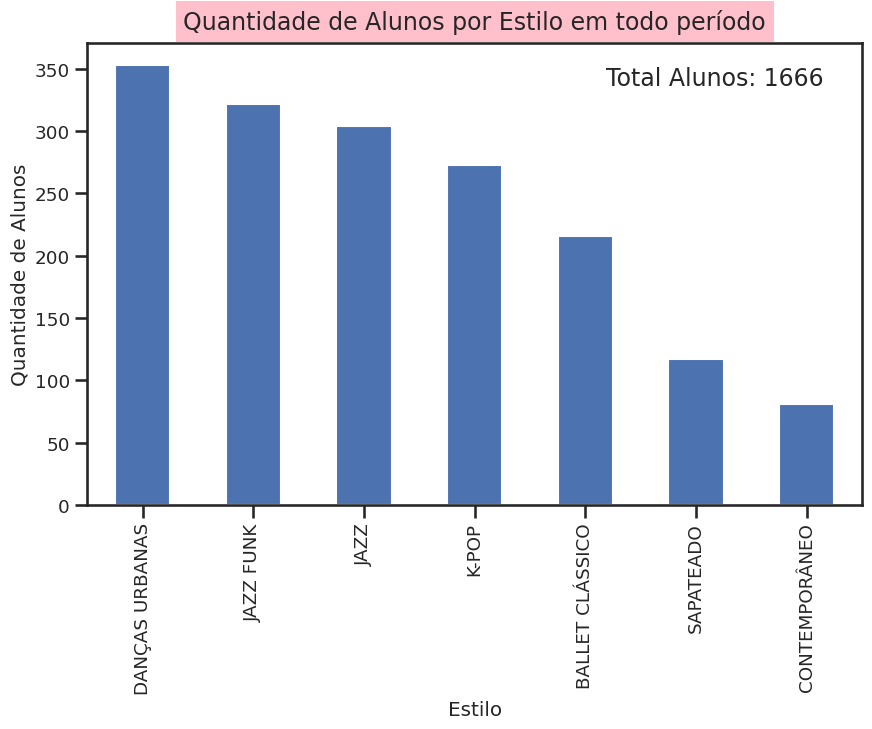

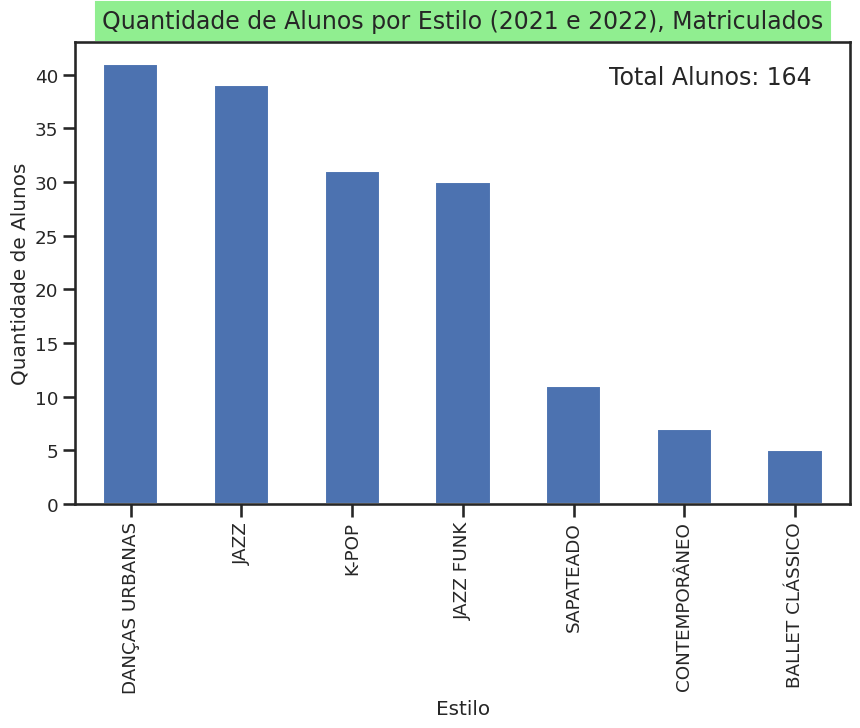

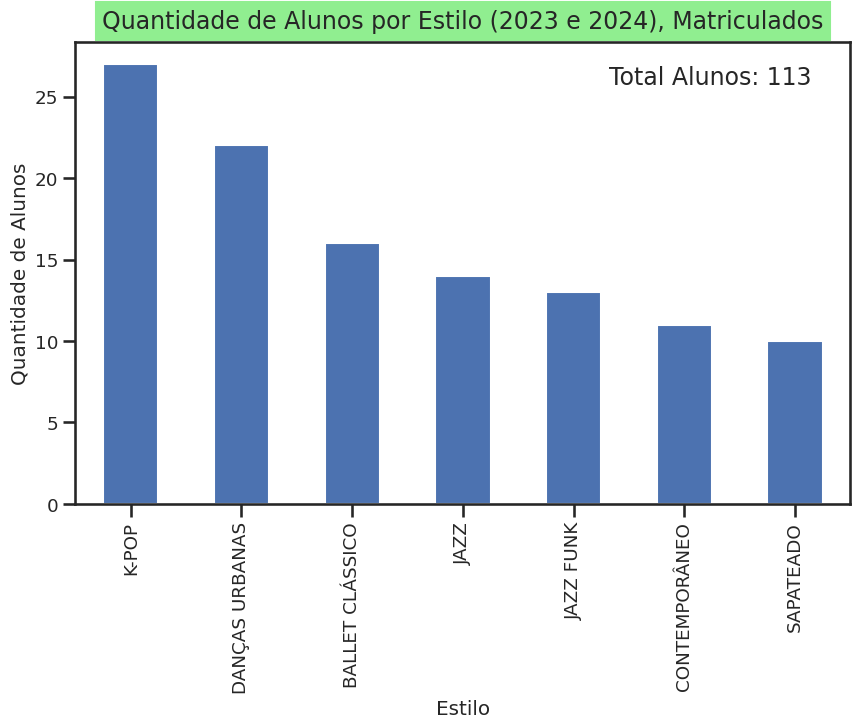

In [ ]:
# Contar a quantidade de alunos por estilo
style_counts1 = dfc['ESTILOS'].value_counts()

# Filtrar apenas os registros com anos de 2023 e 2024 e situação final 'MATRICULADO'
filtered_dfC = dfc[(dfc['DATA 1º CONTATO'].dt.year.isin([2023, 2024])) & (dfc['SITUAÇÃO_FINAL'] == 'MATRICULADO')]

# Filtrar apenas os registros com anos de 2021 e 2022 e situação final 'MATRICULADO'
filtered_dfCA = dfc[(dfc['DATA 1º CONTATO'].dt.year.isin([2021, 2022])) & (dfc['SITUAÇÃO_FINAL'] == 'MATRICULADO')]

# Contar a quantidade de alunos por estilo para 2023 e 2024
style_counts = filtered_dfC['ESTILOS'].value_counts()

# Contar a quantidade de alunos por estilo para 2021 e 2022
style_counts_2021_2022 = filtered_dfCA['ESTILOS'].value_counts()

# Plotar o gráfico de barras qtd. alundos x estilos
plt.figure(figsize=(10, 6))
style_counts1.plot(kind='bar')
plt.title('Quantidade de Alunos por Estilo em todo período',
           backgroundcolor='#FFC0CB',
           pad=10,
           fontsize=17)
plt.xlabel('Estilo')
plt.ylabel('Quantidade de Alunos')
plt.text(0.95, 0.95, f'Total Alunos: {len(dfc)}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=17)
plt.show()

# Plotar o gráfico de barras qtd. alundos x estilos para 2021 e 2022
plt.figure(figsize=(10, 6))
style_counts_2021_2022.plot(kind='bar')
plt.title('Quantidade de Alunos por Estilo (2021 e 2022), Matriculados',
           backgroundcolor='lightgreen',
           pad=10,
           fontsize=17)
plt.xlabel('Estilo')
plt.ylabel('Quantidade de Alunos')
plt.text(0.95, 0.95, f'Total Alunos: {len(filtered_dfCA)}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=17)
plt.show()

# Plotar o gráfico de barras qtd. alundos x estilos para 2023 e 2024
plt.figure(figsize=(10, 6))
style_counts.plot(kind='bar')
plt.title('Quantidade de Alunos por Estilo (2023 e 2024), Matriculados',
           backgroundcolor='lightgreen',
           pad=10,
           fontsize=17)
plt.xlabel('Estilo')
plt.ylabel('Quantidade de Alunos')
plt.text(0.95, 0.95, f'Total Alunos: {len(filtered_dfC)}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=17)
plt.show()

In [ ]:
# Criar uma tabela de contingência entre as variáveis
contingency_table = pd.crosstab(dfc['FAIXA ETARIA'], dfc['ESTILOS'])

In [ ]:
# Calcular o valor de Cramer's V (Medida de correlação entre FAIXA ETARIA e ESTILOS, onde 0 é nenhuma correlação e 1 é correlação perfeita)
chi2, p, dof, expected = chi2_contingency(contingency_table)
cramer_v = math.sqrt(chi2 / (dfc.shape[0] * dfc.shape[1] * (dof - 1)))

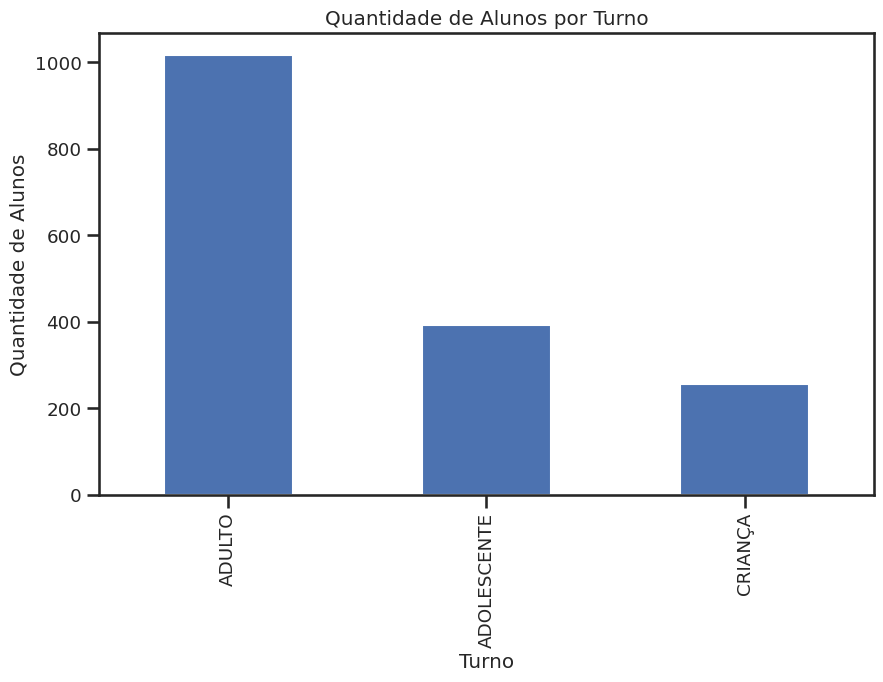

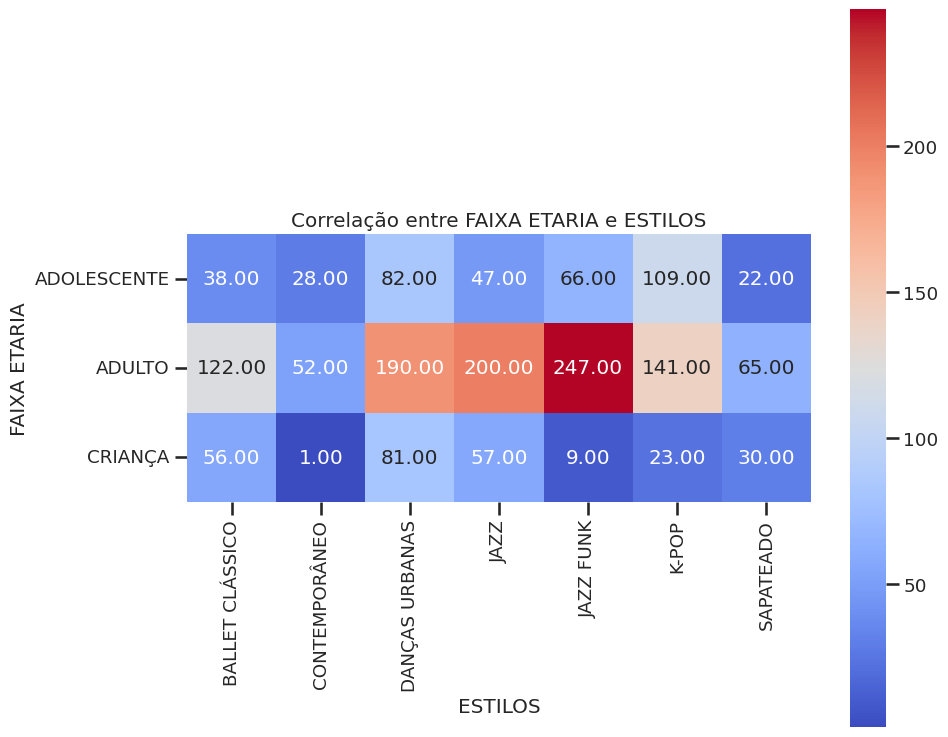

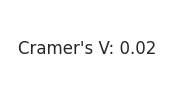

In [ ]:
style_countsF = dfc['FAIXA ETARIA'].value_counts()
contingency_table = pd.crosstab(dfc['FAIXA ETARIA'], dfc['ESTILOS'])
plt.figure(figsize=(10, 6))
style_countsF.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre FAIXA ETARIA e ESTILOS')
plt.tight_layout()
plt.show()

plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_v:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é: 0.02 associação fraca entre as variávei faixa etaria e estilos

In [ ]:
contingency_tableT = pd.crosstab(dfc['TURNO'], dfc['ESTILOS'])

In [ ]:
# Calcular o valor de Cramer's V (Medida de correlação entre TURNO e ESTILOS)
chi2, p, dof, expected = chi2_contingency(contingency_table)
cramer_vT = math.sqrt(chi2 / (dfc.shape[0] * dfc.shape[1] * (dof - 1)))

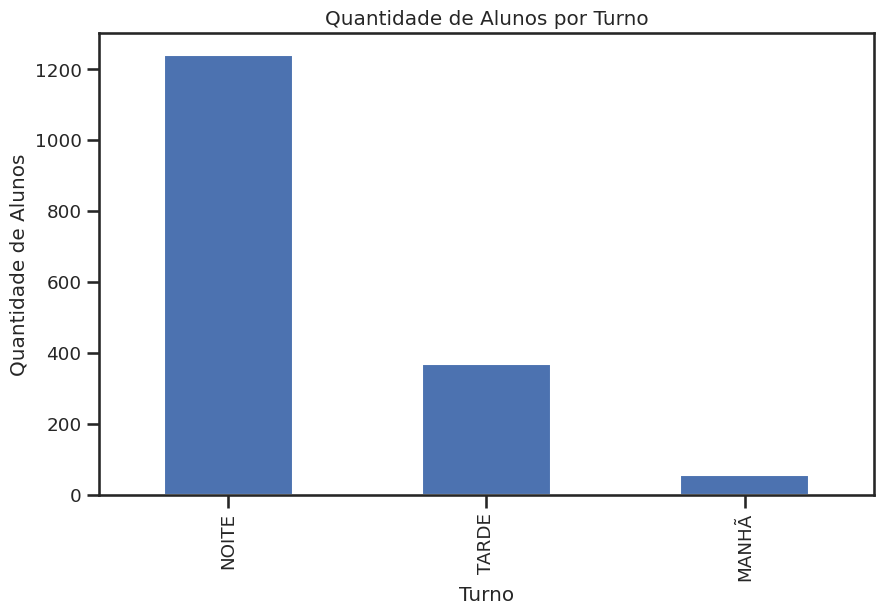

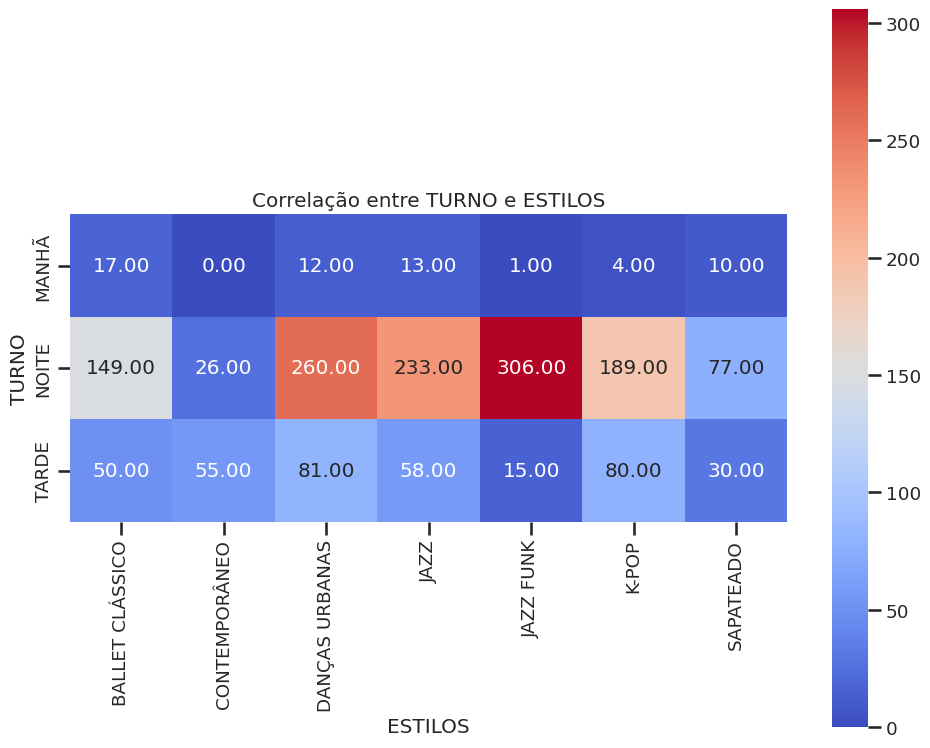

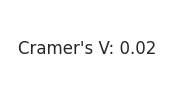

In [ ]:
style_countsT = dfc['TURNO'].value_counts()

plt.figure(figsize=(10, 6))
style_countsT.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_tableT, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre TURNO e ESTILOS')
plt.tight_layout()
plt.show()

plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_vT:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é: 0.02 associação fraca entre as variáveis turno e estilos

In [ ]:
contingency_tableG = pd.crosstab(dfc['GENERO'], dfc['ESTILOS'])

In [ ]:
# Calcular o valor de Cramer's V (Medida de correlação entre GENERO e ESTILOS)
chi2, p, dof, expected = chi2_contingency(contingency_table)
cramer_vG = math.sqrt(chi2 / (dfc.shape[0] * dfc.shape[1] * (dof - 1)))

<Figure size 1000x800 with 0 Axes>

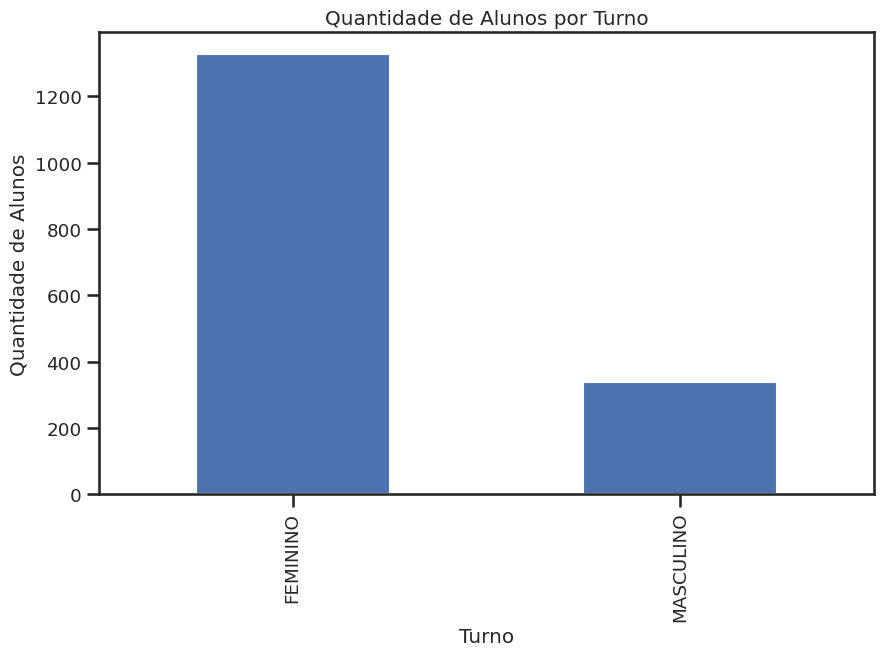

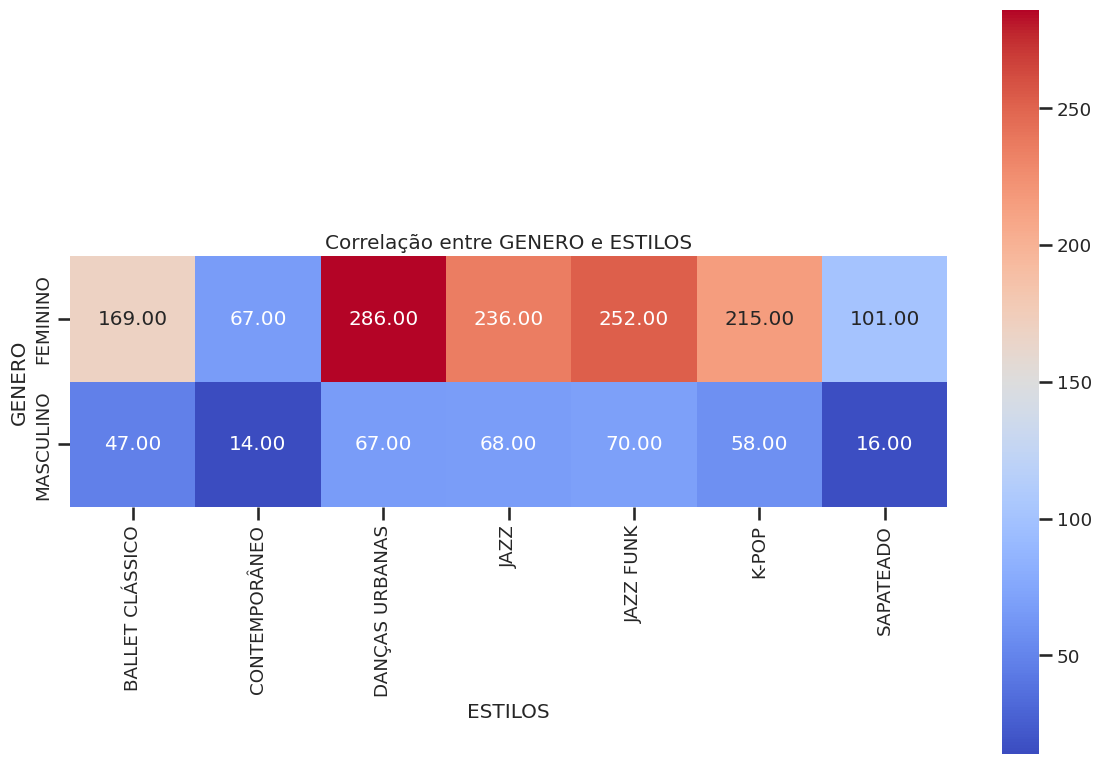

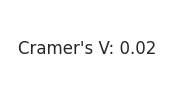

In [ ]:
plt.figure(figsize=(10, 8))
style_countsG = dfc['GENERO'].value_counts()

plt.figure(figsize=(10, 6))
style_countsG.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()
sns.heatmap(contingency_tableG, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre GENERO e ESTILOS')
plt.tight_layout()
plt.show()

plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_vT:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é: 0.02 associação fraca entre as variáveis turno e estilos

In [ ]:
dfc.head(5)

,DATA 1º CONTATO,TRIMESTRE,NOME COMPLETO,IDADE,FAIXA ETARIA,GENERO,TELEFONE,STATUS,VIA,ESTILOS,DATA AGENDAMENTO,TURNO,PROFESSOR,COMPARECEU,SITUAÇÃO_FINAL
0,2022-01-07,1,GRAZIELE,22,ADULTO,MASCULINO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,JAZZ FUNK,Não agendou,NOITE,ALISSON,SIM,MATRICULADO
1,2022-01-07,1,CAMILA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ,Não agendou,NOITE,LIA,NÃO,DESISTIU
2,2021-01-05,1,MAIARA GOUVEA,16,ADOLESCENTE,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,K-POP,Não agendou,NOITE,ALISSON,NÃO,DESISTIU
3,2021-01-05,1,ENIALE RAMOS QUINTINO MÃE ELAINE,11,CRIANÇA,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,JAZZ,Não agendou,TARDE,LIA,SIM,MATRICULADO
4,2022-01-07,1,BIA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,K-POP,Não agendou,NOITE,NÃO INFORMADO,NÃO,DESISTIU


In [ ]:
dfc['STATUS'].unique()

array(['AULA EXPERIMENTAL', 'CAPTAÇÃO', 'CAPTAÇÃO '], dtype=object)

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATA 1º CONTATO   1666 non-null   datetime64[ns]
 1   TRIMESTRE         1666 non-null   int64         
 2   NOME COMPLETO     1664 non-null   object        
 3   IDADE             1666 non-null   int64         
 4   FAIXA ETARIA      1666 non-null   object        
 5   GENERO            1666 non-null   object        
 6   TELEFONE          1666 non-null   object        
 7   STATUS            1666 non-null   object        
 8   VIA               1666 non-null   object        
 9   ESTILOS           1666 non-null   object        
 10  DATA AGENDAMENTO  1666 non-null   object        
 11  TURNO             1666 non-null   object        
 12  PROFESSOR         1666 non-null   object        
 13  COMPARECEU        1666 non-null   object        
 14  SITUAÇÃO_FINAL    1666 n

<h1><font size="5" color="#FF69B4">Base Matricula CEP</font></h1>

<p><font size="4"> Essa base contém a matricula, nome completo do aluno e cep. Servirá para identificarmos os usuários ativos hoje que estão no leed de alunos e também o cep para geolocalização do dashboard no Power BI.</font></p>

In [ ]:
dfm =pd.read_excel('MatriculaCEP.xlsx')

In [ ]:
dfm

,Matrícula,Nome,CEP
0,23001,Clara Yumi Shiraishi,12242-431
1,23002,Luisa Mendes Hypolito Neves Pires,12243-710
2,23003,Sofia Mendes Hypolito Neves Pires,12243-710
3,23008,Maria Eduarda Guedes Santos,12231-070
4,23009,Maria Clara Coelho,12242-410
...,...,...,...
86,24030,Henrique Fernandes Veloso,12243-630
87,24031,Priscilla Pereira Figueiredo,12233-002
88,24032,Rafaela Luchi Marques Penteado,12237-410
89,24033,Leticia Akemi Kague,12246-021


In [ ]:
# Deixe a coluna "Nome" em caixa alta
dfm['Nome'] = dfm['Nome'].str.upper()

In [ ]:
nomes_comuns = dfm['Nome'][dfm['Nome'].isin(dfc['NOME COMPLETO'])]
nomes_comuns

31         GIOVANNA PEREIRA FLORES
40         MEIRE NAKAMURA YAMAMOTO
45      MARIA RITA BARROS MEDEIROS
53      BENJAMIN PONTE DE OLIVEIRA
55                JOYCE CRUZ PONTE
57        CLARA KRUSCHEWSKY FRANCO
58     MYLENA RODRIGUES GOMES ARÃO
59    ISABELLY CRISTINA REIS SILVA
63             CLARA ARRUDA COELHO
72     ISABELLA IRIE TEIXEIRA REIS
80          ANA CLARA MELO JARONES
Name: Nome, dtype: object

In [ ]:
nomes_parecidos = []
for nome in dfm['Nome']:
    for outro_nome in dfc['NOME COMPLETO']:
        if isinstance(nome, float) or isinstance(outro_nome, float):
            continue
        if fuzz.ratio(str(nome), str(outro_nome)) > 80:  # ajuste o valor de threshold aqui
            nomes_parecidos.append((nome, outro_nome))
nomes_parecidos

[('SOFIA MENDES HYPOLITO NEVES PIRES',
  'SOFIA MENDES HYPOLITO NEVES PIRES JÁ É ALUNA'),
 ('FERNANDA SAYURI YKEDA', 'FERNANDA SAYURI'),
 ('BEATRIZ SCHIMIDT BARONI', 'BEATRIZ SCHIMIDT BARONI JÁ É ALUNA'),
 ('ANA CLARA RAMOS CASIMIRO', 'ANA CLARA RAMOS CASEMIRO'),
 ('GIOVANNA PEREIRA FLORES', 'GIOVANNA PEREIRA FLORES'),
 ('VANESSA DE ALMEIDA VITÓRIA', 'VANESSA DE ALMEIDA VITORIA'),
 ('THALITA DIAS FERREIRA', 'TALITHA MORAES FERREIRA'),
 ('MEIRE NAKAMURA YAMAMOTO', 'MEIRE NAKAMURA YAMAMOTO'),
 ('MARIA RITA BARROS MEDEIROS', 'MARIA RITA BARROS MEDEIROS'),
 ('MARIA RITA BARROS MEDEIROS', 'MARIA RITA BARROS MEDEIROS'),
 ('MARIA RITA BARROS MEDEIROS', 'MARIA RITA BARROS MEDEIROS'),
 ('MANUELA NASCIMENTO DE ARAÚJO', 'MANUELA NASCIMENTO MÃE RENATA'),
 ('ELIS HELENA CRUZ PUNTO DE OLIVEIRA', 'ELIS HELENA CRUZ PONTE DE OLIVEIRA'),
 ('BENJAMIN PONTE DE OLIVEIRA', 'BENJAMIN PONTE DE OLIVEIRA'),
 ('JOYCE CRUZ PONTE', 'JOYCE CRUZ PONTE'),
 ('CLARA KRUSCHEWSKY FRANCO', 'CLARA KRUSCHEWSKY FRANCO'),
 ('

In [ ]:
nomes_parecidos = pd.Series(nomes_parecidos)
nomes_parecidos.value_counts()

(ALINE DE FÁTIMA DE CARVALHO VIEIRA, ALINE DE FATIMA DE CARVALHO VIEIRA)             4
(ISABELLA IRIE TEIXEIRA REIS, ISABELLA IRIE TEIXEIRA REIS)                           3
(MARIA RITA BARROS MEDEIROS, MARIA RITA BARROS MEDEIROS)                             3
(CLARA ARRUDA COELHO, CLARA ARRUDA COELHO)                                           2
(AMANDA VENEGAS DOS ANJOS, AMANDA VENEGAS DOS ANJOS CASSIANA)                        2
(SOFIA MENDES HYPOLITO NEVES PIRES, SOFIA MENDES HYPOLITO NEVES PIRES JÁ É ALUNA)    1
(JOYCE CRUZ PONTE, JOYCE CRUZ PONTE)                                                 1
(YASMIN CHU ALVES DA SILVA, YASMIN CHU ALVES DA SILVA MÃE CHU)                       1
(MARIA EDUARDA DA ROSA VIEIRA, MARIA EDUARDA DA ROSA)                                1
(ISABELLY CRISTINA REIS SILVA, ISABELLY CRISTINA REIS SILVA)                         1
(MYLENA RODRIGUES GOMES ARÃO, MYLENA RODRIGUES GOMES ARÃO)                           1
(CLARA KRUSCHEWSKY FRANCO, CLARA KRUSCHEWSK

<h1><font size="5" color="#FF69B4">DF2 ML</font></h1>

<p><font size="4">A base com a diferença de dias do primeiro contato e o agendamento para aula experimental. Aqui vamos verificar também se existe influência na firença de dias entre o primeiro contato e o agendamento para a conversão em matrícula. </font></p>

In [ ]:
dfc2 = dfc

# Substituir valores inválidos por nulo
dfc2['DATA 1º CONTATO'].replace('Não agendou', pd.NA, inplace=True)
dfc2['DATA AGENDAMENTO'].replace('Não agendou', pd.NA, inplace=True)

# Criar uma coluna com a diferença em dias entre as datas
dfc2['DIFERENCA_DIAS'] = (pd.to_datetime(dfc2['DATA AGENDAMENTO'], errors='coerce') - pd.to_datetime(dfc2['DATA 1º CONTATO'], errors='coerce')).dt.days

In [ ]:
dfc2.count()

DATA 1º CONTATO     1666
TRIMESTRE           1666
NOME COMPLETO       1664
IDADE               1666
FAIXA ETARIA        1666
GENERO              1666
TELEFONE            1666
STATUS              1666
VIA                 1666
ESTILOS             1666
DATA AGENDAMENTO     222
TURNO               1666
PROFESSOR           1666
COMPARECEU          1666
SITUAÇÃO_FINAL      1666
DIFERENCA_DIAS       222
dtype: int64

In [ ]:
df_completo = dfc2[dfc2['DIFERENCA_DIAS'].notna()].copy()

In [ ]:
df_completo.count()

DATA 1º CONTATO     222
TRIMESTRE           222
NOME COMPLETO       222
IDADE               222
FAIXA ETARIA        222
GENERO              222
TELEFONE            222
STATUS              222
VIA                 222
ESTILOS             222
DATA AGENDAMENTO    222
TURNO               222
PROFESSOR           222
COMPARECEU          222
SITUAÇÃO_FINAL      222
DIFERENCA_DIAS      222
dtype: int64

In [ ]:
df_completo.head()

,DATA 1º CONTATO,TRIMESTRE,NOME COMPLETO,IDADE,FAIXA ETARIA,GENERO,TELEFONE,STATUS,VIA,ESTILOS,DATA AGENDAMENTO,TURNO,PROFESSOR,COMPARECEU,SITUAÇÃO_FINAL,DIFERENCA_DIAS
1099,2023-02-06,1,BARBARA GUSSON MÃE CYNTIA,20,ADULTO,FEMININO,0000-0000,AULA EXPERIMENTAL,PRESENCIAL,K-POP,45169,NOITE,ALISSON,SIM,MATRICULADO,-19394.0
1443,2023-06-14,2,THAIS COSTA PEREIRA,34,ADULTO,MASCULINO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,JAZZ,45100,TARDE,CÍCERO,SIM,DESISTIU,-19522.0
1445,2023-06-19,2,LUIS FELIPE BAPTISTA DOS REIS SILVA,31,ADULTO,MASCULINO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,DANÇAS URBANAS,45119,NOITE,NICOLAS,NÃO,DESISTIU,-19527.0
1446,2023-06-21,2,MICHELLE CURY NOGUEIRA RAGAZINI,42,ADULTO,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,JAZZ,45100,TARDE,CICERO,SIM,MATRICULADO,-19529.0
1447,2023-06-21,2,MARIA BEATRIZ,8,CRIANÇA,FEMININO,0000-0000,AULA EXPERIMENTAL,INSTAGRAM,SAPATEADO,45099,NOITE,AMANDA,SIM,EM ABERTO,-19529.0


In [ ]:
# Criar a tabela de contingência com FAIXA ETARIA e ESTILOS
contingency_table1 = pd.crosstab(df_completo['FAIXA ETARIA'], df_completo['ESTILOS'])

# Calcular o QI quadrado para verificar se há uma associação significativa entre as variáveis
chi2, p, dof, expected = stats.chi2_contingency(contingency_table1)
print("Valor do QI quadrado:", chi2)
print("Valor p:", p)
print("Grau de liberdade:", dof)

Valor do QI quadrado: 35.26277941930337
Valor p: 0.0004252387282075846
Grau de liberdade: 12


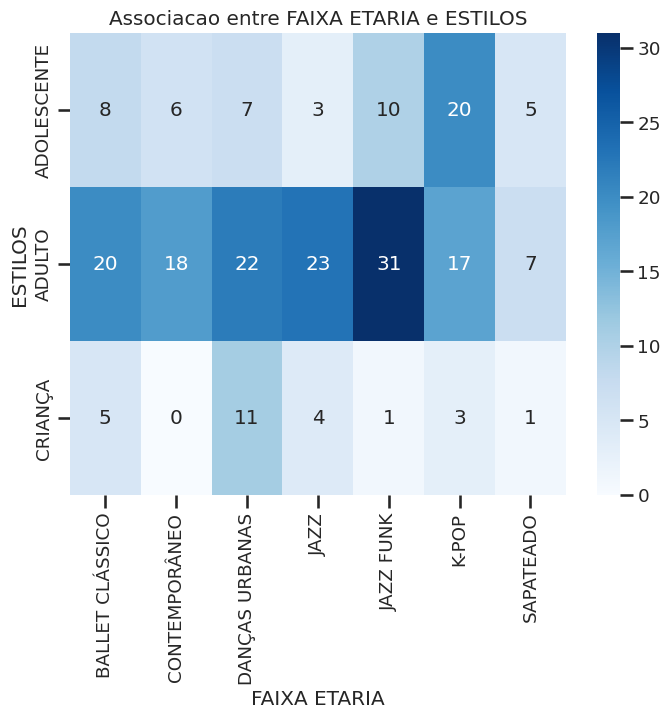

In [ ]:
# Criar a figura
fig, ax = plt.subplots(figsize=(8, 6))

# Criar a heatmap
sns.heatmap(contingency_table1, annot=True, cmap='Blues', ax=ax)

# Adicionar título e rótulos
ax.set_title('Associacao entre FAIXA ETARIA e ESTILOS')
ax.set_xlabel('FAIXA ETARIA')
ax.set_ylabel('ESTILOS')

# Mostrar a figura
plt.show()



In [ ]:
# Criar a tabela de contingência com DIFERENÇA DE DIAS e ESTILOS
contingency_table2 = pd.crosstab(pd.cut(df_completo['DIFERENCA_DIAS'], bins=[0, 7, 14, 30, 60], labels=['0-6 dias', '7-13 dias', '14-29 dias', '30+ dias']), df_completo['ESTILOS'])